# Python-Beispiele für RIS-API

This notebook contains some examples to show how to work with the RIS API.
Dieses Notebook beinhaltet einige Python-Beispiele, die zeigen, wie man mit der RIS-API arbeiten kann.

Inhaltsverzeichnis:

1. [Mitglieder einer Partei](#Mitglieder-einer-Partei)
1. [Gemeinderats-Geschäfte](#Gemeinderats-Geschäfte)

In [63]:
import requests
from pprint import pprint
import pandas as pd
import random

In [69]:
SSL_VERIFY = True
# evtl. SSL_VERIFY auf False setzen wenn die Verbindung zu https://www.gemeinderat-zuerich.ch nicht klappt (z.B. wegen Proxy)
# Um die SSL Verifikation auszustellen, bitte die nächste Zeile einkommentieren ("#" entfernen)
# SSL_VERIFY = False

In [70]:
if not SSL_VERIFY:
    import urllib3
    urllib3.disable_warnings()

## Mitglieder einer Partei

Um alle Mitglieder einer Partei zu bekommen, müssen folgende Abfragen gemacht werden:
    
    1. ID der Partei holen
    1. Suche nach Mitgliedern der Partei (mit dieser ID)
    1. *Optional:* Detail-Informationen eines Mitglieds holen
    
    

### Alle Parameter holen

In [72]:
headers = {'Accept': 'application/json'}
r = requests.get('https://www.gemeinderat-zuerich.ch/api/Mitglieder/parameter', headers=headers, verify=SSL_VERIFY)
params = r.json()

In [73]:
# get id of random party
parties = params['Parteien']
party = random.choice(parties)
party

{'Name': 'FDP', 'Id': '8240033e-4818-4406-8f73-b7829d99ddee'}

### Mitglieder der Partei abfragen

In [74]:
query = {'parteiId': party['Id']}
headers = {'Accept': 'application/json'}
r = requests.get('https://www.gemeinderat-zuerich.ch/api/Mitglieder/suchen', params=query, headers=headers, verify=SSL_VERIFY)
members = r.json()
members

[{'Id': '40f5621f-cd63-4650-8f59-0c19f83fdb1f',
  'Name': 'Avdili',
  'Vorname': 'Përparim',
  'Titel': None,
  'Partei': 'FDP',
  'Wahlkreis': ' 9',
  'WahlkreisOrderBy': 105},
 {'Id': '54c0ca10-69df-4f6d-add5-f10d52aaebcc',
  'Name': 'Bourgeois',
  'Vorname': 'Yasmine',
  'Titel': None,
  'Partei': 'FDP',
  'Wahlkreis': '7 und 8',
  'WahlkreisOrderBy': 104},
 {'Id': 'b9c2d889-fb8d-4d11-911b-aa84f9c91d18',
  'Name': 'Brunner',
  'Vorname': 'Alexander',
  'Titel': None,
  'Partei': 'FDP',
  'Wahlkreis': '7 und 8',
  'WahlkreisOrderBy': 104},
 {'Id': '3c57e8f6-144e-456f-a1e2-b04d3dab62eb',
  'Name': 'Bünger',
  'Vorname': 'Pablo',
  'Titel': None,
  'Partei': 'FDP',
  'Wahlkreis': '7 und 8',
  'WahlkreisOrderBy': 104},
 {'Id': '72d9c149-3269-42b0-848e-0e21fc8b0c21',
  'Name': 'Bürki',
  'Vorname': 'Martin',
  'Titel': None,
  'Partei': 'FDP',
  'Wahlkreis': '1 und 2',
  'WahlkreisOrderBy': 100},
 {'Id': '716cab9a-1d9c-4c2e-929d-5a777513a293',
  'Name': 'Egger',
  'Vorname': 'Urs',
  'Ti

### Details der Mitglieder abfragen

Mit dem `/Mitglieder/details` Endpunkt können Details eines Mitglieds abgefragt werden:

In [75]:
def get_member_details(member):
    query = {'mid': member['Id']}
    headers = {'Accept': 'application/json'}
    r = requests.get('https://www.gemeinderat-zuerich.ch/api/Mitglieder/details', params=query, headers=headers, verify=SSL_VERIFY)
    details = r.json()
    # trim "Wahlkreis" and "Wohnkreis" since they have a padding
    details['Wahlkreis'] = details['Wahlkreis'].strip()
    if details['Wohnkreis']:
        details['Wohnkreis'] = details['Wohnkreis'].strip()
    # add original member to keep WahlkreisOrderBy column
    details.update(member)
    return details
    
member_details = [get_member_details(m) for m in members]
df = pd.DataFrame(member_details)
df

,Adressen,Anrede,Beruf,EmailGeschaeftlich,EmailPrivat,Fraktion,Geburtstag,GruppenMitgliedschaften,Id,Interessenverbindungen,...,NameInUrl,Partei,Sitznummer,TelefonGeschaeftlich,TelefonPrivat,Titel,Vorname,Wahlkreis,WahlkreisOrderBy,Wohnkreis
0,"[{'Addressart': 'Postadresse', 'Strasse1': Non...",Herr,Bankkaufmann,,avdili@fdp-zh9.ch,FDP,1987-10-10T00:00:00,"[{'Von': '2018-05-16T00:00:00', 'Bis': None, '...",40f5621f-cd63-4650-8f59-0c19f83fdb1f,"- Secondas Zürich, Vorstand",...,P%c3%abrparim%20Avdili,FDP,None,None,None,None,Përparim,9,105,9
1,"[{'Addressart': 'Postadresse', 'Strasse1': '',...",Frau,"Primarlehrerin, Dipl. Hôtelière",,info@yasmine-bourgeois.ch,FDP,1974-04-06T00:00:00,"[{'Von': '2018-05-16T00:00:00', 'Bis': None, '...",54c0ca10-69df-4f6d-add5-f10d52aaebcc,None,...,Yasmine%20Bourgeois,FDP,None,None,,None,Yasmine,7 und 8,104,7
2,"[{'Addressart': 'Postadresse', 'Strasse1': '',...",Herr,Impact Investor,,,FDP,1974-12-23T00:00:00,"[{'Von': '2015-11-26T00:00:00', 'Bis': None, '...",b9c2d889-fb8d-4d11-911b-aa84f9c91d18,"- Brunner Invest AG Zürich, Verwaltungsrat\r- ...",...,Alexander%20Brunner,FDP,None,,,None,Alexander,7 und 8,104,8
3,"[{'Addressart': 'Postadresse', 'Strasse1': Non...",Herr,Rechtsanwalt,pablo.buenger@zurich-law.com,,FDP,1983-01-04T00:00:00,"[{'Von': '2016-09-09T00:00:00', 'Bis': None, '...",3c57e8f6-144e-456f-a1e2-b04d3dab62eb,None,...,Pablo%20B%c3%bcnger,FDP,None,044 224 66 00,None,None,Pablo,7 und 8,104,3
4,"[{'Addressart': 'Postadresse', 'Strasse1': '',...",Herr,Unternehmer / Vermögensverwalter,martin@martinvestments.ch,,FDP,1970-12-30T00:00:00,"[{'Von': '2013-02-07T00:00:00', 'Bis': None, '...",72d9c149-3269-42b0-848e-0e21fc8b0c21,"- martInvestments, Martin Bürki Investment Man...",...,Martin%20B%c3%bcrki,FDP,None,044 392 23 33,,None,Martin,1 und 2,100,2
5,"[{'Addressart': 'Postadresse', 'Strasse1': Non...",Herr,Geschäftsführer FDP Kanton Zürich,None,uegger@bluewin.ch,FDP,1955-12-19T00:00:00,"[{'Von': '2006-05-03T00:00:00', 'Bis': None, '...",716cab9a-1d9c-4c2e-929d-5a777513a293,"- H+U Egger Consulting GmbH, Gesellschafter/Ge...",...,Urs%20Egger,FDP,None,None,044 381 00 18,Dr.,Urs,7 und 8,104,8
6,"[{'Addressart': 'Postadresse', 'Strasse1': '',...",Herr,Rechtsanwalt,,egli@egli-law.ch,FDP,1968-08-15T00:00:00,"[{'Von': '2014-05-07T00:00:00', 'Bis': None, '...",8e54fd16-8091-4ad3-93bd-6a08698cd9a9,"- Quartierverein Höngg, Zürich, Vorstandsmitglied",...,Andreas%20Egli,FDP,None,043 960 31 92,,None,Andreas,10,106,10
7,"[{'Addressart': 'Postadresse', 'Strasse1': Non...",Herr,Mediengestalter / Geschäftsinhaber,,fdp@huserundkaspar.ch,FDP,1961-04-19T00:00:00,"[{'Von': '2013-04-24T00:00:00', 'Bis': None, '...",bd07bf4e-9e94-459a-a7cd-a376d4e8003e,None,...,Christian%20Huser,FDP,None,044 300 66 66,044 882 42 66,None,Christian,11,107,11
8,"[{'Addressart': 'Postadresse', 'Strasse1': Non...",Herr,"Elektriker, Sachbearbeiter",None,kleger-fdp@gmx.ch,FDP,1980-09-12T00:00:00,"[{'Von': '2014-05-07T00:00:00', 'Bis': None, '...",510f49c8-76b0-4c37-a031-518867986a26,"- Regionale Verkehrskonferenz, Mitglied",...,Thomas%20Kleger,FDP,None,None,043 539 43 32,None,Thomas,11,107,11
9,"[{'Addressart': 'Postadresse', 'Strasse1': Non...",Herr,Jurist,,raphaelmkobler@icloud.com,FDP,1980-09-30T00:00:00,"[{'Von': '2014-05-29T00:00:00', 'Bis': None, '...",e01dacdf-58f4-4bea-8515-081590ea17a1,"- Pestalozzi-Bibliothek Zürich (PBZ), Vorstand...",...,Raphael%20Kobler,FDP,None,,043 817 05 65,None,Raphael,3,101,None


### Diagramm aller Mitglieder einer Partei nach Wahlkreis

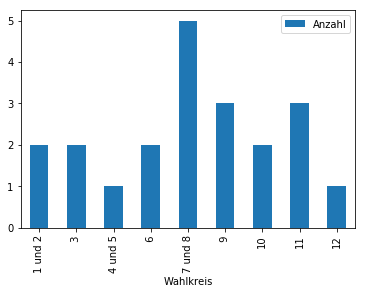

In [76]:
count_by_wahlkreis = df[['Wahlkreis', 'WahlkreisOrderBy']].groupby(['Wahlkreis', 'WahlkreisOrderBy']).size().reset_index(name='Anzahl')
count_by_wahlkreis = count_by_wahlkreis.sort_values(by=['WahlkreisOrderBy'])
count_by_wahlkreis.plot.bar(x='Wahlkreis', y='Anzahl')

## Gemeinderats-Geschäfte

* Welches Mitglied des Gemeinderats hat welche Geschäte eingebracht?
* Welchen Status haben diese Geschäfte?

### Mitglied des Gemeinderats abfragen

In [77]:
headers = {'Accept': 'application/json'}
r = requests.get('https://www.gemeinderat-zuerich.ch/api/Mitglieder', headers=headers, verify=SSL_VERIFY)
members = r.json()
member = random.choice(members)
member

{'Id': '8ae2b81e-3866-473d-b4f3-91d75d491859',
 'Name': 'Señorán',
 'Vorname': 'Maria del Carmen',
 'Titel': None,
 'Partei': 'SVP',
 'Wahlkreis': '1 und 2',
 'WahlkreisOrderBy': 100}

### Geschäfte eines Mitglieds abfragen

In [78]:
query = {'personId': member['Id']}
headers = {'Accept': 'application/json'}
r = requests.get('https://www.gemeinderat-zuerich.ch/api/Geschaeft', params=query, headers=headers, verify=SSL_VERIFY)
result = r.json()
deals = pd.DataFrame(result['Geschaefte'])
deals

,GeschaeftId,Geschaeftsart,Geschaeftsjahr,Geschaeftsnummer,Geschaeftstitel
0,5bb3f2aa-758b-4498-8148-27b59ccb2d34,Schriftliche Anfrage,2019,132,"Ökobilanz der städtischen Fahrzeuge, Beurteilu..."
1,ab5d67ba-2f16-427f-9465-3edcf5570c68,Postulat,2018,416,Pilotprojekt für ein Rechtsabbiegen bei Rotlic...
2,da5d0454-0ea3-4966-afc7-939330c2cbfd,Postulat,2018,415,Zusammenarbeit zwischen den politischen Kreisp...
3,4c967eaf-2359-4a8c-a386-908154339357,Schriftliche Anfrage,2018,366,Grossbrand im Data Quest-Gebäude am Bahnhofpla...
4,b8ad42e9-cb25-4f8e-9bb7-fc319ff98349,Postulat,2018,319,Prüfung der notwendigen Lichtsignalanlagen zur...
5,ec9f9e54-ad32-42ad-a141-868f44d595fa,Schriftliche Anfrage,2018,308,"Aktionstag der UNIA für Lohngleichheit, Angabe..."
6,30cdb205-5a35-49dc-923c-5df9d78d5e27,Schriftliche Anfrage,2018,128,Entwicklung der Honorare der Ärztinnen und Ärz...
7,2c8986c9-5d8f-46df-8c3a-228c86cd93bd,Postulat,2018,100,Einführung einer Halbtageskarte für die Blaue ...


In [79]:
deals_by_ga = deals[['Geschaeftsart']].groupby(['Geschaeftsart']).size().reset_index(name='Anzahl')
deals_by_ga

,Geschaeftsart,Anzahl
0,Postulat,4
1,Schriftliche Anfrage,4


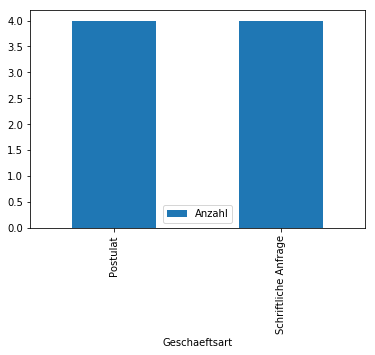

In [80]:
deals_by_ga.plot.bar(x='Geschaeftsart', y='Anzahl')